In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### This is 'UFC Complete Dataset All Events 1996-2024' dataset from kaggle ('https://www.kaggle.com/datasets/alexandroszigiriadis/ufc-complete-dataset-all-events-1996-2024')

##### We will see the number of fighters by gender, best win methods, who the best and worst fighters are and some correlations between fighters' win rate and their core performance metrics (striking, takedowns, etc.)

In [203]:
df = pd.read_excel('data/Fights_dataset.xlsx')

In [204]:
df.head()

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Dern vs. Yan,Julija Stoliarenko,Chelsea Chandler,Blue,Catch Weight,0,Women,KO/TKO,1,3.0,...,-4.53,-5.08,-0.96,1.45,-0.06,-0.33,-0.03,0.21,45839.0,-0.38
1,UFC 279: Diaz vs. Ferguson,Irene Aldana,Macy Chiasson,Red,Catch Weight,0,Women,KO/TKO,3,3.0,...,0.00,-10.16,1.71,3.80,-0.04,0.13,0.11,0.14,-0.3,-2.22
2,UFC Fight Night: Vera vs. Cruz,Angela Hill,Loopy Godinez,Red,Catch Weight,0,Women,Decision - Unanimous,3,3.0,...,0.00,7.62,1.13,1.18,0.01,-0.12,-0.01,-0.11,-1.0,-2.66
3,UFC Fight Night: Cyborg vs. Lansberg,Cristiane Justino,Lina Lansberg,Red,Catch Weight,0,Women,KO/TKO,2,5.0,...,4.54,7.62,21641.00,-1.62,-0.03,0.28,0.20,0.47,0.3,0.14
4,UFC 198: Werdum vs Miocic,Cristiane Justino,Leslie Smith,Red,Catch Weight,0,Women,KO/TKO,1,3.0,...,4.54,5.08,-0.28,-6.16,0.12,0.55,0.13,0.32,0.4,0.66


In [205]:
df.tail()

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
7434,UFC 2: No Way Out,Orlando Wiet,Robert Lucarelli,Red,Open Weight,0,Men,KO/TKO,1,NaN,...,-34.02,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7435,UFC 2: No Way Out,Frank Hamaker,Thaddeus Luster,Red,Open Weight,0,Men,Submission,1,NaN,...,15.88,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,UFC 2: No Way Out,Johnny Rhodes,David Levicki,Red,Open Weight,0,Men,KO/TKO,1,NaN,...,-29.49,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,UFC 2: No Way Out,Patrick Smith,Ray Wizard,Red,Open Weight,0,Men,Submission,1,NaN,...,0.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,UFC 2: No Way Out,Scott Morris,Sean Daugherty,Red,Open Weight,0,Men,Submission,1,NaN,...,15.87,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
df.sample(5)

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
4930,UFC Fight Night: Saffiedine vs Lim,Katsunori Kikuno,Quinn Mulhern,Red,Lightweight,0,Men,Decision - Unanimous,3,3.0,...,-4.54,NaN,1.16,0.38,0.12,0.55,0.10,0.43,0.8,0.52
4087,UFC 192: Cormier vs Gustafsson,Alan Jouban,Albert Tumenov,Blue,Welterweight,0,Men,KO/TKO,1,3.0,...,0.00,0.00,1.91,0.43,0.08,0.24,0.02,-0.17,0.3,0.31
2492,UFC Fight Night: Till vs. Masvidal,Volkan Oezdemir,Dominick Reyes,Blue,Light Heavyweight,0,Men,Decision - Split,3,3.0,...,0.00,-5.08,-0.16,0.15,-0.03,0.05,0.07,0.00,-0.3,0.21
1329,UFC Fight Night: Cannonier vs. Gastelum,Clay Guida,Mark Madsen,Blue,Lightweight,0,Men,Decision - Split,3,3.0,...,0.00,-5.08,-0.92,-0.96,-0.16,-0.30,0.09,0.05,0.6,0.27
3097,UFC 218: Holloway vs. Aldo 2,Justin Willis,Allen Crowder,Red,Heavyweight,0,Men,KO/TKO,1,3.0,...,8.62,5.08,0.42,-0.38,0.08,0.33,0.01,-0.64,-1.2,-0.89


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7439 entries, 0 to 7438
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_name              7439 non-null   object 
 1   r_fighter               7439 non-null   object 
 2   b_fighter               7439 non-null   object 
 3   winner                  7439 non-null   object 
 4   weight_class            7439 non-null   object 
 5   is_title_bout           7439 non-null   int64  
 6   gender                  7439 non-null   object 
 7   method                  7439 non-null   object 
 8   finish_round            7439 non-null   int64  
 9   total_rounds            7408 non-null   float64
 10  time_sec                7439 non-null   int64  
 11  referee                 7407 non-null   object 
 12  r_kd                    7439 non-null   int64  
 13  r_sig_str               7439 non-null   int64  
 14  r_sig_str_att           7439 non-null   

In [208]:
# Getting the columns for the analysis

In [209]:
df = df[['r_fighter', 'b_fighter', 'winner', 'gender', 'method', 'finish_round',  'time_sec', 'referee', 'r_ctrl_sec', \
        'b_ctrl_sec', 'ctrl_sec_diff', 'r_td_acc', 'b_td_acc', 'td_acc_diff', 'r_sig_str_acc', 'b_sig_str_acc', \
        'sig_str_acc_diff', 'r_kd', 'b_kd', 'kd_diff', 'r_sub_att', 'b_sub_att', 'sub_att_diff', 'r_rev', \
        'b_rev', 'rev_diff', 'r_age', 'b_age', 'age_diff', 'r_reach', 'b_reach', 'reach_diff', 'r_height', 'b_height']]

In [210]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,b_rev,rev_diff,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,0,0,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,0,0,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,0,0,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,0,0,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,0,0,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26


In [211]:
# Removing rows that dont contain valid data

In [212]:
df.isna().sum()

r_fighter              0
b_fighter              0
winner                 0
gender                 0
method                 0
finish_round           0
time_sec               0
referee               32
r_ctrl_sec             0
b_ctrl_sec             0
ctrl_sec_diff          0
r_td_acc               0
b_td_acc               0
td_acc_diff            0
r_sig_str_acc          0
b_sig_str_acc          0
sig_str_acc_diff       0
r_kd                   0
b_kd                   0
kd_diff                0
r_sub_att              0
b_sub_att              0
sub_att_diff           0
r_rev                  0
b_rev                  0
rev_diff               0
r_age                 76
b_age                190
age_diff             213
r_reach              412
b_reach              888
reach_diff          1038
r_height               0
b_height               0
dtype: int64

In [213]:
df = df.dropna()

In [214]:
df.isna().sum()

r_fighter           0
b_fighter           0
winner              0
gender              0
method              0
finish_round        0
time_sec            0
referee             0
r_ctrl_sec          0
b_ctrl_sec          0
ctrl_sec_diff       0
r_td_acc            0
b_td_acc            0
td_acc_diff         0
r_sig_str_acc       0
b_sig_str_acc       0
sig_str_acc_diff    0
r_kd                0
b_kd                0
kd_diff             0
r_sub_att           0
b_sub_att           0
sub_att_diff        0
r_rev               0
b_rev               0
rev_diff            0
r_age               0
b_age               0
age_diff            0
r_reach             0
b_reach             0
reach_diff          0
r_height            0
b_height            0
dtype: int64

# How many UFC fighters are there, grouped by age and gender?

In [215]:
# Getting fighters' age and gender

In [216]:
# Preparing all fighters' dataset

In [217]:
df_fighters = df[['r_fighter', 'b_fighter', 'r_age', 'b_age']]

r_fighters = df_fighters[['r_fighter', 'r_age']].rename(columns = {'r_fighter': 'fighter', 'r_age': 'age'}).reset_index(drop = True)
b_fighters = df_fighters[['b_fighter', 'b_age']].rename(columns = {'b_fighter': 'fighter', 'b_age': 'age'}).reset_index(drop = True)

rb_fighters = pd.concat([r_fighters, b_fighters], ignore_index = True)

all_fighters = rb_fighters.sort_values(by = 'age').drop_duplicates(subset = 'fighter', keep = 'last').reset_index(drop = True)

In [218]:
all_fighters.head()

,fighter,age
0,Raul Rosas Jr.,19.0
1,Igor Severino,20.0
2,Francisco Prado,21.0
3,Iasmin Lucindo,22.0
4,Tereza Bleda,22.0


In [219]:
# Preparing women's dataset
df_women = df[df['gender'] == 'Women']

r_df = df_women[['r_fighter', 'r_age']].rename(columns = {'r_fighter': 'fighter', 'r_age': 'age'}).reset_index(drop = True)
b_df = df_women[['b_fighter', 'b_age']].rename(columns = {'b_fighter': 'fighter', 'b_age': 'age'}).reset_index(drop = True)

rb_fighters = pd.concat([r_df, b_df], ignore_index = True)

w_fighters = rb_fighters.sort_values(by = 'age').drop_duplicates(subset = 'fighter', keep = 'last').reset_index(drop = True)


In [220]:
w_fighters.head(5)

,fighter,age
0,Tereza Bleda,22.0
1,Iasmin Lucindo,22.0
2,Luana Santos,23.0
3,Denise Gomes,24.0
4,Kay Hansen,24.0


In [221]:
# Preparing men's dataset

df_men = df[df['gender'] == 'Men']

r_df = df_men[['r_fighter', 'r_age']].rename(columns = {'r_fighter': 'fighter', 'r_age': 'age'}).reset_index(drop = True)
b_df = df_men[['b_fighter', 'b_age']].rename(columns = {'b_fighter': 'fighter', 'b_age': 'age'}).reset_index(drop = True)

rb_fighters = pd.concat([r_df, b_df], ignore_index = True)

m_fighters = rb_fighters.sort_values(by = 'age').drop_duplicates(subset = 'fighter', keep = 'last').reset_index(drop = True)


In [222]:
m_fighters.head()

,fighter,age
0,Raul Rosas Jr.,19.0
1,Igor Severino,20.0
2,Francisco Prado,21.0
3,Joshua Van,22.0
4,Felipe dos Santos,23.0


In [223]:
# Creating age categories for visualization

bins = [18, 24, 29, 34, 39, 44, 60, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-60', '60 +']

In [224]:
# Assigning categories for all the previous fighter datasets

all_fighters['age_group'] = pd.cut(all_fighters['age'], bins = bins, labels = labels)

In [225]:
all_fighters.head()

,fighter,age,age_group
0,Raul Rosas Jr.,19.0,18-24
1,Igor Severino,20.0,18-24
2,Francisco Prado,21.0,18-24
3,Iasmin Lucindo,22.0,18-24
4,Tereza Bleda,22.0,18-24


In [226]:
age_counts = all_fighters['age_group'].value_counts().sort_index()

In [227]:
age_counts

age_group
18-24     26
25-29    249
30-34    523
35-39    509
40-44    345
45-60    163
60 +       0
Name: count, dtype: int64

In [228]:
m_fighters['age_group'] = pd.cut(m_fighters['age'], bins = bins, labels = labels)

In [229]:
m_fighters.head()

,fighter,age,age_group
0,Raul Rosas Jr.,19.0,18-24
1,Igor Severino,20.0,18-24
2,Francisco Prado,21.0,18-24
3,Joshua Van,22.0,18-24
4,Felipe dos Santos,23.0,18-24


In [230]:
m_counts = m_fighters['age_group'].value_counts().sort_index()

In [231]:
m_counts

age_group
18-24     19
25-29    209
30-34    444
35-39    443
40-44    325
45-60    161
60 +       0
Name: count, dtype: int64

In [232]:
w_fighters['age_group'] = pd.cut(w_fighters['age'], bins = bins, labels = labels)

In [233]:
w_fighters.head()

,fighter,age,age_group
0,Tereza Bleda,22.0,18-24
1,Iasmin Lucindo,22.0,18-24
2,Luana Santos,23.0,18-24
3,Denise Gomes,24.0,18-24
4,Kay Hansen,24.0,18-24


In [234]:
w_counts = w_fighters['age_group'].value_counts().sort_index()

In [235]:
w_counts

age_group
18-24     7
25-29    40
30-34    79
35-39    66
40-44    20
45-60     2
60 +      0
Name: count, dtype: int64

In [236]:
# Creating a bar chart

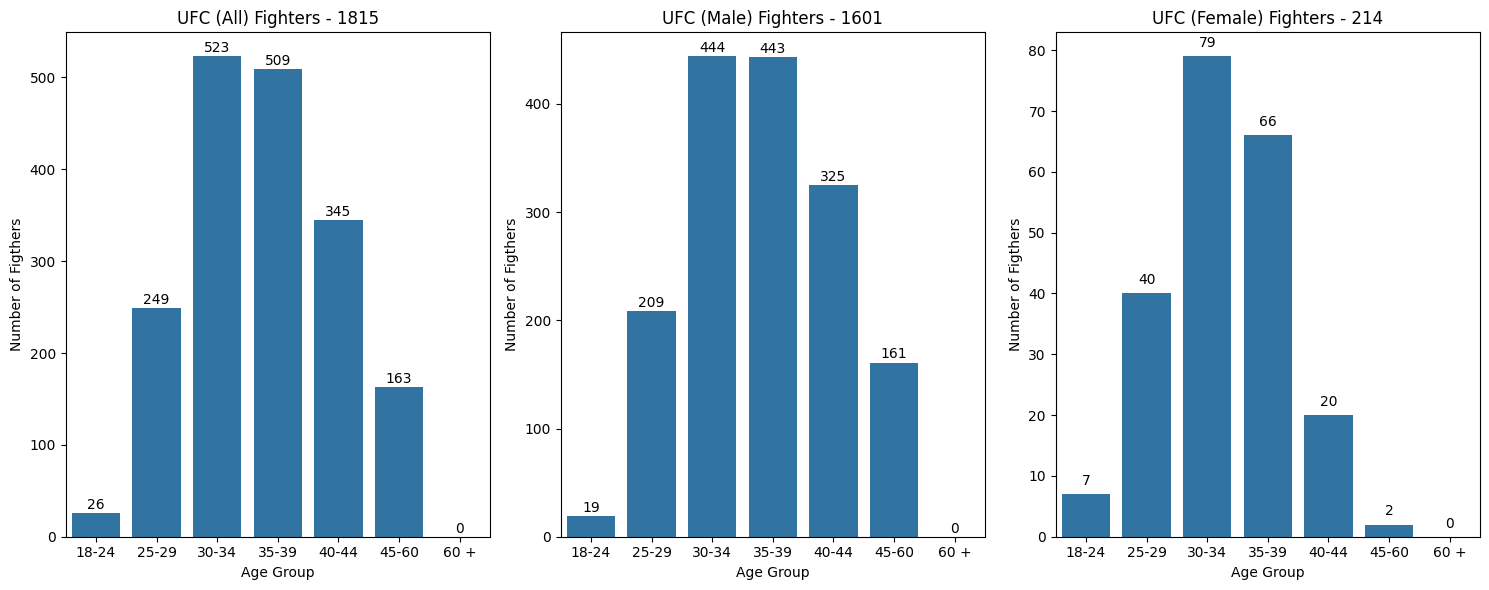

In [237]:
fig, axes = plt.subplots(1, 3, figsize = (15, 6)) 

ax = sns.barplot(x = age_counts.index, y = age_counts.values, ax = axes[0])
for i, count in enumerate(age_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
axes[0].set_title(f'UFC (All) Fighters - {age_counts.values.sum()}')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Figthers')

ax = sns.barplot(x = m_counts.index, y = m_counts.values, ax = axes[1])
for i, count in enumerate(m_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
axes[1].set_title(f'UFC (Male) Fighters - {m_counts.values.sum()}')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Number of Figthers')

ax = sns.barplot(x = w_counts.index, y = w_counts.values, ax = axes[2])
for i, count in enumerate(w_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
axes[2].set_title(f'UFC (Female) Fighters - {w_counts.values.sum()}')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Number of Figthers')

plt.tight_layout()
plt.show()

#### The majority of UFC fighters fall within the 30-39 age range, with 30-34 being the largest group for both of the genders. Male fighters are more evenly spread into older age categories, while female fighters drop off sharply after 40. Few fighters are below 25 or over 45, and none at 60 and above. These charts suggest that UFC fighters' careers typucally peak in the early to mid-30s.

# What win methods are popular? For men and women separately

In [238]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,b_rev,rev_diff,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,0,0,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,0,0,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,0,0,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,0,0,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,0,0,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26


In [239]:
# Gropuing the dataset by gender and win methods and counting the number of wins

win_method_counts = df.groupby(['gender', 'method']).size().reset_index(name = 'wins')

In [240]:
win_method_counts

,gender,method,wins
0,Men,DQ,18
1,Men,Decision - Majority,46
2,Men,Decision - Split,541
3,Men,Decision - Unanimous,2056
4,Men,KO/TKO,1898
5,Men,Submission,1052
6,Men,TKO - Doctor's Stoppage,59
7,Women,DQ,1
8,Women,Decision - Majority,5
9,Women,Decision - Split,91


In [241]:
win_method_counts['% of Total'] = win_method_counts.groupby(['gender'])['wins'].transform(lambda x: (x / x.sum()) * 100)

In [242]:
win_method_counts

,gender,method,wins,% of Total
0,Men,DQ,18,0.317460
1,Men,Decision - Majority,46,0.811287
2,Men,Decision - Split,541,9.541446
3,Men,Decision - Unanimous,2056,36.261023
4,Men,KO/TKO,1898,33.474427
5,Men,Submission,1052,18.553792
6,Men,TKO - Doctor's Stoppage,59,1.040564
7,Women,DQ,1,0.144092
8,Women,Decision - Majority,5,0.720461
9,Women,Decision - Split,91,13.112392


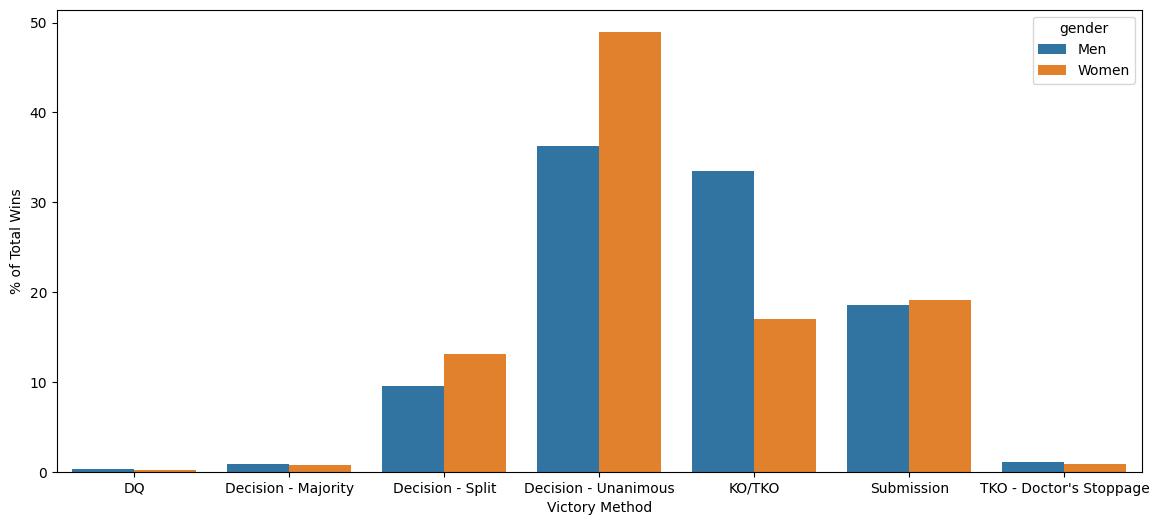

In [243]:
# Plotting the dataset

plt.figure(figsize = (14, 6))

sns.barplot(data = win_method_counts, x = 'method', y = '% of Total', hue = 'gender')
plt.xlabel('Victory Method')
plt.ylabel('% of Total Wins')
plt.show()

#### The most frequent win method for both genders is (Decision - Unanimous). Men finish more fights via (KO/TKO) than women, possibly due to differences in striking power and technique. Submission seems to be fairly even across both genders. The (Decision - Split) method is more common in women (13%) in comparison to men (9,5%). Other win methods do not seem to be meaningful in win outcomes.


# Who are the Top Fighters by Wins and Losses?

In [244]:
# Creating the winners and losers columns

In [245]:
df['winner_name'] = df.apply(lambda df: df['r_fighter'] if df['winner'] == 'Red' else\
                            df['b_fighter'], axis = 1)

In [246]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,rev_diff,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,0,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,0,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,0,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,0,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,0,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino


In [247]:
df['loser_name'] = df.apply(lambda df: df['b_fighter'] if df['winner'] == 'Red' else\
                           df['r_fighter'], axis = 1)

In [248]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith


In [249]:
# Getting fighters wins and losses and then stacking them

In [250]:
wins = df['winner_name'].value_counts().reset_index(name = 'wins')
wins.rename(columns = {'winner_name': 'fighter'}, inplace = True)

In [251]:
wins

,fighter,wins
0,Jim Miller,24
1,Donald Cerrone,23
2,Demian Maia,22
3,Dustin Poirier,22
4,Rafael Dos Anjos,21
...,...,...
1453,Francis Marshall,1
1454,Tamires Vidal,1
1455,Tresean Gore,1
1456,Ricardo Romero,1


In [252]:
losses = df['loser_name'].value_counts().reset_index(name = 'losses')
losses.rename(columns = {'loser_name': 'fighter'}, inplace = True)

In [253]:
losses

,fighter,losses
0,Clay Guida,17
1,Jim Miller,16
2,Jeremy Stephens,16
3,Michael Johnson,15
4,Andrei Arlovski,15
...,...,...
1710,AJ Cunningham,1
1711,Abdul-Kareem Al-Selwady,1
1712,Nick Thompson,1
1713,Cristiane Justino,1


In [254]:
all_records = pd.merge(wins, losses, on = 'fighter', how = 'outer').fillna(0)

In [255]:
all_records

,fighter,wins,losses
0,AJ Cunningham,0.0,1.0
1,AJ Dobson,1.0,3.0
2,AJ Fletcher,1.0,3.0
3,Aalon Cruz,0.0,2.0
4,Aaron Phillips,0.0,4.0
...,...,...,...
1810,Zhang Mingyang,1.0,0.0
1811,Zhang Tiequan,0.0,3.0
1812,Zhang Weili,8.0,2.0
1813,Zubaira Tukhugov,5.0,3.0


In [256]:
all_records.dtypes

fighter     object
wins       float64
losses     float64
dtype: object

In [257]:
# Getting gender info to map the gender to all_records dataset

In [258]:
r_gender = df[['r_fighter', 'gender']].rename(columns = {'r_fighter': 'fighter'})

In [259]:
r_gender

,fighter,gender
0,Julija Stoliarenko,Women
1,Irene Aldana,Women
2,Angela Hill,Women
3,Cristiane Justino,Women
4,Cristiane Justino,Women
...,...,...
7184,Chuck Liddell,Men
7207,Tito Ortiz,Men
7250,Jeremy Horn,Men
7263,Vitor Belfort,Men


In [260]:
b_gender = df[['b_fighter', 'gender']].rename(columns = {'b_fighter': 'fighter'})

In [261]:
b_gender

,fighter,gender
0,Chelsea Chandler,Women
1,Macy Chiasson,Women
2,Loopy Godinez,Women
3,Lina Lansberg,Women
4,Leslie Smith,Women
...,...,...
7184,Jeff Monson,Men
7207,Wanderlei Silva,Men
7250,Chuck Liddell,Men
7263,Wanderlei Silva,Men


In [262]:
# Creating Series for Mapping

In [263]:
all_genders = pd.concat([r_gender, b_gender]).drop_duplicates('fighter').set_index('fighter')['gender']

In [264]:
all_genders

fighter
Julija Stoliarenko    Women
Irene Aldana          Women
Angela Hill           Women
Cristiane Justino     Women
Amanda Ribas          Women
                      ...  
Rory Singer             Men
Ken Shamrock            Men
Rob MacDonald           Men
Nick Thompson           Men
Alex Karalexis          Men
Name: gender, Length: 1815, dtype: object

In [265]:
# Mapping Gender to Fighters

In [266]:
all_records['gender'] = all_records['fighter'].map(all_genders)

In [267]:
all_records

,fighter,wins,losses,gender
0,AJ Cunningham,0.0,1.0,Men
1,AJ Dobson,1.0,3.0,Men
2,AJ Fletcher,1.0,3.0,Men
3,Aalon Cruz,0.0,2.0,Men
4,Aaron Phillips,0.0,4.0,Men
...,...,...,...,...
1810,Zhang Mingyang,1.0,0.0,Men
1811,Zhang Tiequan,0.0,3.0,Men
1812,Zhang Weili,8.0,2.0,Women
1813,Zubaira Tukhugov,5.0,3.0,Men


In [268]:
# Getting top 15 fighters grouped by Gender

top_15 = all_records.sort_values(['gender', 'losses', 'wins'],\
ascending = [True, True, False]).groupby('gender').head(15)

In [269]:
top_15

,fighter,wins,losses,gender
1004,Khabib Nurmagomedov,13.0,0.0,Men
1281,Movsar Evloev,8.0,0.0,Men
507,Dricus Du Plessis,7.0,0.0,Men
684,Ian Machado Garry,7.0,0.0,Men
695,Ilia Topuria,7.0,0.0,Men
719,Jack Della Maddalena,7.0,0.0,Men
1010,Khamzat Chimaev,7.0,0.0,Men
1282,Muhammad Mokaev,6.0,0.0,Men
1583,Shavkat Rakhmonov,6.0,0.0,Men
1799,Zabit Magomedsharipov,6.0,0.0,Men


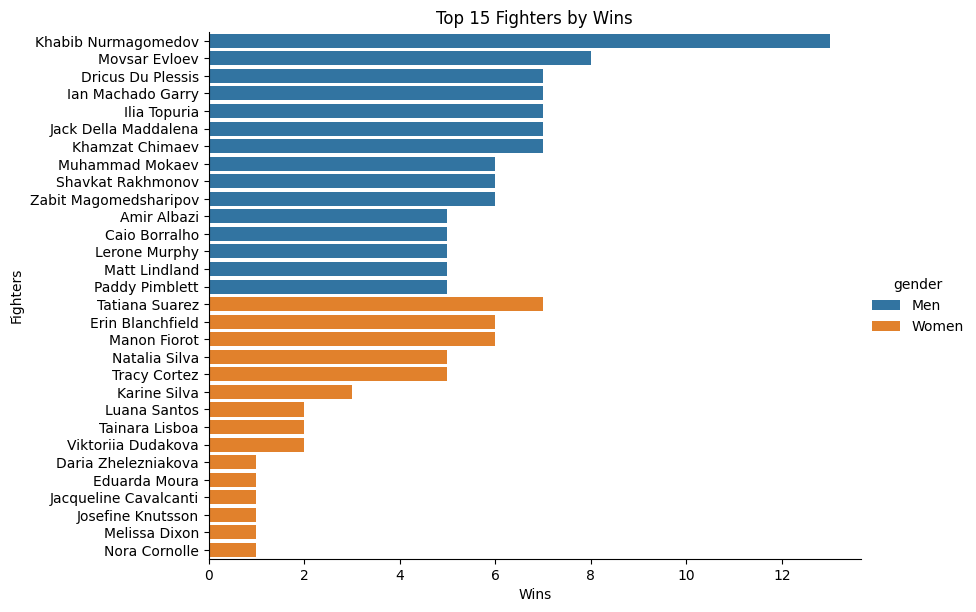

In [270]:
sns.catplot(data = top_15, x = 'wins', y = 'fighter', hue = 'gender', kind = 'bar',\
           height = 6, aspect = 1.5)
plt.title('Top 15 Fighters by Wins')
plt.xlabel('Wins')
plt.ylabel('Fighters')
plt.show()

#### These are the Top-15 UFC fighters with 0 losses, separated by gender. Khabib Nurmagomedov stands out with the most wins by a large margin. Among the male fighters, names like Movsar Evloev, Dricus Du Plessis, Ian Machado Garry and Ilia Topuria also show strong records, most of them with 6-7 wins. On the women's side, Tatiana Suarez, Erin Blanchfield and Manon Fiorot lead with 6 or more wins each. After that, there is a noticeable drop with female fighters totalling 1-5 wins. 

In [271]:
# Getting bottom 15 fighters grouped by Gender
bottom_15 = all_records.sort_values(['gender', 'wins', 'losses'],\
ascending = [True, True, False]).groupby('gender').head(15)

In [272]:
bottom_15

,fighter,wins,losses,gender
1377,Phil Baroni,0.0,7.0,Men
1384,Phillipe Nover,0.0,6.0,Men
409,Daniel Lacerda,0.0,5.0,Men
810,Jesse Ronson,0.0,5.0,Men
898,Jorge Santiago,0.0,5.0,Men
1292,Naoyuki Kotani,0.0,5.0,Men
1550,Sean Soriano,0.0,5.0,Men
1606,Steve Cantwell,0.0,5.0,Men
4,Aaron Phillips,0.0,4.0,Men
43,Alen Amedovski,0.0,4.0,Men


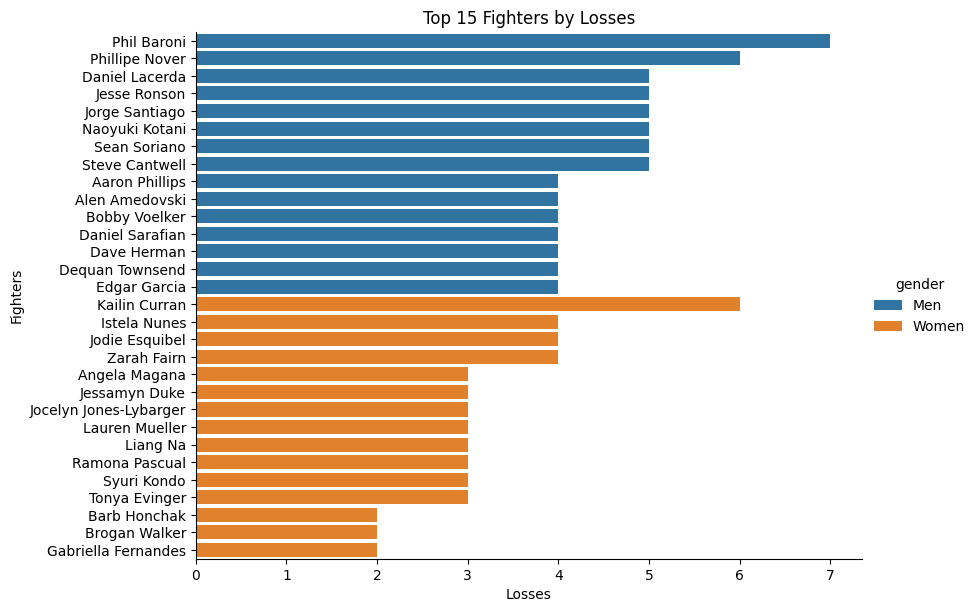

In [273]:
sns.catplot(data = bottom_15, x = 'losses', y = 'fighter', hue = 'gender', kind = 'bar',\
           height = 6, aspect = 1.5)
plt.title('Top 15 Fighters by Losses')
plt.xlabel('Losses')
plt.ylabel('Fighters')
plt.show()

#### These are the worst Top-15 UFC fighters with 0 wins, separated by gender. Phil Baroni leads the group with 7 losses. Other male fighters, from Phillipe Nover up to Steve Cantwell, lead with 5-6 losses. On the women's side, Kailin Curran has lost 6 times, noticeably more than her peers, most of whom have 3 or fewer losses.

# Do younger fighters win more fights?

In [274]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith


In [275]:
# Creating younger_fighter_name / younger_fighter_won columns

In [276]:
# Getting rows with age differences

df_young = df[df['r_age'] != df['b_age']].copy()

In [277]:
df_young[df_young['age_diff'] == 0]

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name


In [278]:
df_young.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith


In [279]:
df_young['younger_fighter_name'] =  np.where(df_young['age_diff'] < 0, df_young['r_fighter'],\
                                             df_young['b_fighter'])

In [280]:
df_young['younger_fighter_won'] = df_young['winner_name'] == df_young['younger_fighter_name']

In [281]:
df_young['age_diff'] = df_young['age_diff'].abs()

In [282]:
df_young.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name,younger_fighter_name,younger_fighter_won
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko,Julija Stoliarenko,False
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson,Macy Chiasson,False
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez,Loopy Godinez,False
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg,Cristiane Justino,True
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith,Cristiane Justino,True


In [283]:
win_by_age = df_young.groupby(['gender', 'age_diff'])['younger_fighter_won'].mean().reset_index()

In [284]:
win_by_age.head(10)

,gender,age_diff,younger_fighter_won
0,Men,1.0,0.517281
1,Men,2.0,0.538084
2,Men,3.0,0.567024
3,Men,4.0,0.559190
4,Men,5.0,0.563280
5,Men,6.0,0.589011
6,Men,7.0,0.586957
7,Men,8.0,0.615385
8,Men,9.0,0.612565
9,Men,10.0,0.669355


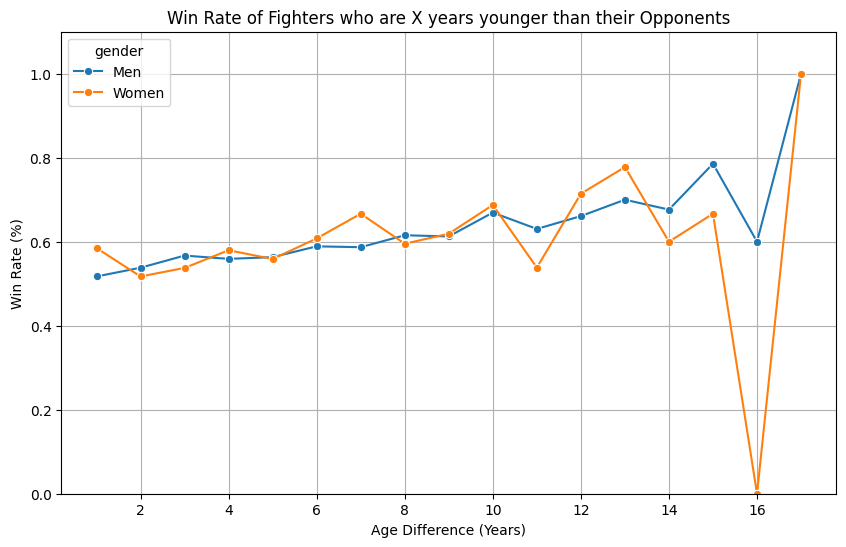

In [285]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = win_by_age, x = 'age_diff', y = 'younger_fighter_won', hue = 'gender', marker = 'o')
plt.xlabel('Age Difference (Years)')
plt.ylabel('Win Rate (%)')
plt.title('Win Rate of Fighters who are X years younger than their Opponents')
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

#### There does seem to be a correlation between a fighter's age and his/her win rate, but its better to check the fight volumes that happened at each age difference category.

In [286]:
df_young.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name,younger_fighter_name,younger_fighter_won
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko,Julija Stoliarenko,False
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson,Macy Chiasson,False
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez,Loopy Godinez,False
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg,Cristiane Justino,True
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith,Cristiane Justino,True


In [287]:
age_stats = df_young.groupby(['gender', 'age_diff'])['younger_fighter_won']\
.agg(['mean', 'count']).reset_index()

In [288]:
age_stats.head()

,gender,age_diff,mean,count
0,Men,1.0,0.517281,868
1,Men,2.0,0.538084,814
2,Men,3.0,0.567024,746
3,Men,4.0,0.559190,642
4,Men,5.0,0.563280,561


In [289]:
age_stats.head()

,gender,age_diff,mean,count
0,Men,1.0,0.517281,868
1,Men,2.0,0.538084,814
2,Men,3.0,0.567024,746
3,Men,4.0,0.559190,642
4,Men,5.0,0.563280,561


In [290]:
genders = age_stats['gender'].unique()

In [291]:
genders

array(['Men', 'Women'], dtype=object)

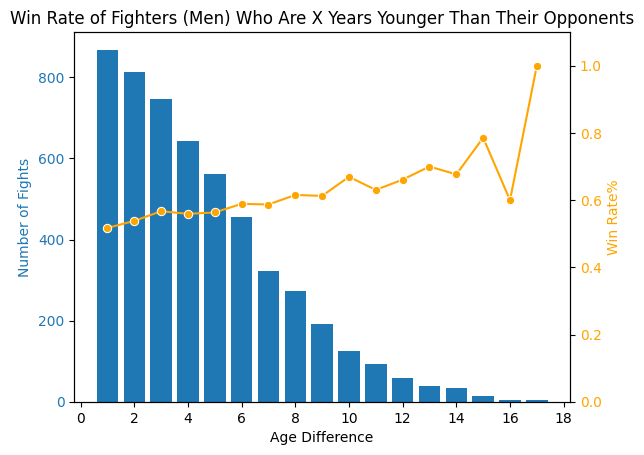

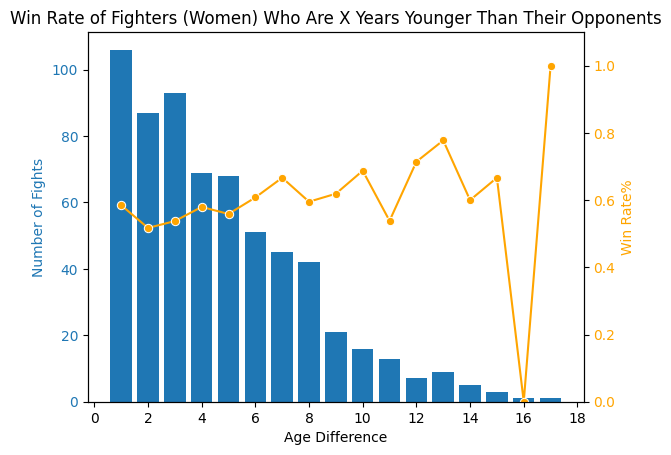

In [292]:
from matplotlib.ticker import MaxNLocator
for gender in genders:
    data = age_stats[age_stats['gender'] == gender]

    fig, ax1 = plt.subplots()

    ax1.bar(data['age_diff'], data['count'], color = 'tab:blue')
    ax1.set_ylabel('Number of Fights', color = 'tab:blue')
    ax1.set_xlabel('Age Difference')
    ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')
    ax1.xaxis.set_major_locator(MaxNLocator(integer = True))

    ax2 = ax1.twinx()
    sns.lineplot(
        data = data, x = 'age_diff', y = 'mean', ax = ax2, color = 'orange', marker = 'o'
    )
    ax2.set_ylim(0, 1.1)
    ax2.set_ylabel('Win Rate%', color = 'orange')
    ax2.tick_params(axis = 'y', labelcolor = 'orange')

    plt.title(f"Win Rate of Fighters ({gender}) Who Are X Years Younger Than Their Opponents")
    plt.show()

#### In general, for both men and women, younger fighters tend to have higher win rates as the age gap with their opponents increases. The trnend is more consistent for men. For women, the pattern is a bit more scattered. However, in both cases, the number of fights drops sharply as the age difference grows, meaning that win rates should taken with caution due to low fight volumes.

In [293]:
# Checking correlation with more fight volumes

In [294]:
filtered_men = age_stats[(age_stats['gender'] == 'Men') & (age_stats['count'] > 450)]

In [295]:
filtered_men.head()

,gender,age_diff,mean,count
0,Men,1.0,0.517281,868
1,Men,2.0,0.538084,814
2,Men,3.0,0.567024,746
3,Men,4.0,0.559190,642
4,Men,5.0,0.563280,561


In [296]:
# Correlation between age and win rate

In [297]:
corr1 = filtered_men['age_diff'].corr(filtered_men['mean'])

In [298]:
corr1

np.float64(0.9162724545133611)

In [299]:
corr2 = filtered_men['count'].corr(filtered_men['mean'])

In [300]:
corr2

np.float64(-0.8870172962355937)

In [301]:
filtered_women = age_stats[(age_stats['gender'] == 'Women') & (age_stats['count'] > 40)]

In [302]:
filtered_women.head()

,gender,age_diff,mean,count
17,Women,1.0,0.584906,106
18,Women,2.0,0.517241,87
19,Women,3.0,0.537634,93
20,Women,4.0,0.579710,69
21,Women,5.0,0.558824,68


In [303]:
corr1 = filtered_women['age_diff'].corr(filtered_women['mean'])

In [304]:
corr1

np.float64(0.6418259537064162)

In [305]:
corr2 = filtered_women['count'].corr(filtered_women['mean'])

In [306]:
corr2

np.float64(-0.6537155273125799)

#### Win rate for younger male fighters strongly increases with age gap. However, high win rates mostly appear in rare (low-volume) matchups. The same trend is true for women, but much weaker. While the trend in wins is upwards, sample size matters, especially at extreme age differences.


# Analyzing winning chances of fighters based on performance metrics

In [307]:
df.head()

,r_fighter,b_fighter,winner,gender,method,finish_round,time_sec,referee,r_ctrl_sec,b_ctrl_sec,...,r_age,b_age,age_diff,r_reach,b_reach,reach_diff,r_height,b_height,winner_name,loser_name
0,Julija Stoliarenko,Chelsea Chandler,Blue,Women,KO/TKO,1,255,Jacob Montalvo,19,125,...,30.0,33.0,-3.0,167.64,172.72,-5.08,170.18,172.72,Chelsea Chandler,Julija Stoliarenko
1,Irene Aldana,Macy Chiasson,Red,Women,KO/TKO,3,141,Jason Herzog,60,208,...,36.0,32.0,4.0,172.72,182.88,-10.16,175.26,180.34,Irene Aldana,Macy Chiasson
2,Angela Hill,Loopy Godinez,Red,Women,Decision - Unanimous,3,300,Jason Herzog,36,17,...,39.0,30.0,9.0,162.56,154.94,7.62,160.02,157.48,Angela Hill,Loopy Godinez
3,Cristiane Justino,Lina Lansberg,Red,Women,KO/TKO,2,149,Mario Yamasaki,344,25,...,38.0,42.0,-4.0,172.72,165.10,7.62,172.72,170.18,Cristiane Justino,Lina Lansberg
4,Cristiane Justino,Leslie Smith,Red,Women,KO/TKO,1,81,Eduardo Herdy,12,0,...,38.0,41.0,-3.0,172.72,167.64,5.08,172.72,175.26,Cristiane Justino,Leslie Smith


In [308]:
# Stacking fighters so that one row means one fighter metrics 

In [309]:
df.columns

Index(['r_fighter', 'b_fighter', 'winner', 'gender', 'method', 'finish_round',
       'time_sec', 'referee', 'r_ctrl_sec', 'b_ctrl_sec', 'ctrl_sec_diff',
       'r_td_acc', 'b_td_acc', 'td_acc_diff', 'r_sig_str_acc', 'b_sig_str_acc',
       'sig_str_acc_diff', 'r_kd', 'b_kd', 'kd_diff', 'r_sub_att', 'b_sub_att',
       'sub_att_diff', 'r_rev', 'b_rev', 'rev_diff', 'r_age', 'b_age',
       'age_diff', 'r_reach', 'b_reach', 'reach_diff', 'r_height', 'b_height',
       'winner_name', 'loser_name'],
      dtype='object')

In [310]:
red_f = df[['r_fighter', 'winner_name', 'gender', 'r_ctrl_sec', 'r_td_acc','r_sig_str_acc',\
'r_kd', 'r_sub_att', 'r_rev', 'r_reach', 'r_height']].copy()

In [311]:
red_f.columns = ['fighter', 'winner_name', 'gender', 'ctrl_sec', 'td_acc', 'sig_str_acc', 'kd',\
'sub_att', 'rev', 'reach', 'height']

In [312]:
red_f.head()

,fighter,winner_name,gender,ctrl_sec,td_acc,sig_str_acc,kd,sub_att,rev,reach,height
0,Julija Stoliarenko,Chelsea Chandler,Women,19,0.33,0.44,0,0,0,167.64,170.18
1,Irene Aldana,Irene Aldana,Women,60,0.00,0.52,1,2,0,172.72,175.26
2,Angela Hill,Angela Hill,Women,36,0.16,0.38,0,0,0,162.56,160.02
3,Cristiane Justino,Cristiane Justino,Women,344,1.00,0.66,0,0,0,172.72,172.72
4,Cristiane Justino,Cristiane Justino,Women,12,0.00,0.65,1,0,0,172.72,172.72


In [313]:
blue_f = df[['b_fighter', 'winner_name', 'gender', 'b_ctrl_sec', 'b_td_acc','b_sig_str_acc',\
'b_kd', 'b_sub_att', 'b_rev', 'b_reach', 'b_height']].copy()

In [314]:
blue_f.columns = ['fighter', 'winner_name', 'gender', 'ctrl_sec', 'td_acc', 'sig_str_acc', 'kd',\
'sub_att', 'rev', 'reach', 'height']

In [315]:
blue_f.head()

,fighter,winner_name,gender,ctrl_sec,td_acc,sig_str_acc,kd,sub_att,rev,reach,height
0,Chelsea Chandler,Chelsea Chandler,Women,125,0.00,0.54,0,0,0,172.72,172.72
1,Macy Chiasson,Irene Aldana,Women,208,0.37,0.41,0,0,0,182.88,180.34
2,Loopy Godinez,Angela Hill,Women,17,0.33,0.38,0,0,0,154.94,157.48
3,Lina Lansberg,Cristiane Justino,Women,25,0.00,0.60,0,0,0,165.10,170.18
4,Leslie Smith,Cristiane Justino,Women,0,0.00,0.22,0,0,0,167.64,175.26


In [316]:
stacked_records = pd.concat([red_f, blue_f], ignore_index = True)

In [317]:
stacked_records

,fighter,winner_name,gender,ctrl_sec,td_acc,sig_str_acc,kd,sub_att,rev,reach,height
0,Julija Stoliarenko,Chelsea Chandler,Women,19,0.33,0.44,0,0,0,167.64,170.18
1,Irene Aldana,Irene Aldana,Women,60,0.00,0.52,1,2,0,172.72,175.26
2,Angela Hill,Angela Hill,Women,36,0.16,0.38,0,0,0,162.56,160.02
3,Cristiane Justino,Cristiane Justino,Women,344,1.00,0.66,0,0,0,172.72,172.72
4,Cristiane Justino,Cristiane Justino,Women,12,0.00,0.65,1,0,0,172.72,172.72
...,...,...,...,...,...,...,...,...,...,...,...
12723,Jeff Monson,Chuck Liddell,Men,63,0.05,0.30,0,0,0,187.96,175.26
12724,Wanderlei Silva,Tito Ortiz,Men,7,0.00,0.37,0,0,0,187.96,180.34
12725,Chuck Liddell,Jeremy Horn,Men,0,0.00,0.50,0,0,1,193.04,187.96
12726,Wanderlei Silva,Vitor Belfort,Men,0,0.00,0.50,0,0,0,187.96,180.34


In [318]:
stacked_records['win_status'] = stacked_records['fighter'] == stacked_records['winner_name']

In [319]:
stacked_records.head(10)

,fighter,winner_name,gender,ctrl_sec,td_acc,sig_str_acc,kd,sub_att,rev,reach,height,win_status
0,Julija Stoliarenko,Chelsea Chandler,Women,19,0.33,0.44,0,0,0,167.64,170.18,False
1,Irene Aldana,Irene Aldana,Women,60,0.00,0.52,1,2,0,172.72,175.26,True
2,Angela Hill,Angela Hill,Women,36,0.16,0.38,0,0,0,162.56,160.02,True
3,Cristiane Justino,Cristiane Justino,Women,344,1.00,0.66,0,0,0,172.72,172.72,True
4,Cristiane Justino,Cristiane Justino,Women,12,0.00,0.65,1,0,0,172.72,172.72,True
5,Irene Aldana,Irene Aldana,Women,0,0.00,0.47,0,0,0,172.72,175.26,True
6,Angela Hill,Angela Hill,Women,483,0.55,0.63,0,0,1,162.56,160.02,True
7,Angela Hill,Angela Hill,Women,0,0.00,0.52,0,0,0,162.56,160.02,True
8,Irene Aldana,Irene Aldana,Women,84,0.00,0.56,1,0,0,172.72,175.26,True
9,Angela Hill,Angela Hill,Women,232,0.33,0.57,0,0,0,162.56,160.02,True


In [320]:
stacked_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fighter      12728 non-null  object 
 1   winner_name  12728 non-null  object 
 2   gender       12728 non-null  object 
 3   ctrl_sec     12728 non-null  int64  
 4   td_acc       12728 non-null  float64
 5   sig_str_acc  12728 non-null  float64
 6   kd           12728 non-null  int64  
 7   sub_att      12728 non-null  int64  
 8   rev          12728 non-null  int64  
 9   reach        12728 non-null  float64
 10  height       12728 non-null  float64
 11  win_status   12728 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(3)
memory usage: 1.1+ MB


In [321]:
metrics = stacked_records.groupby('win_status')[['ctrl_sec', 'td_acc', 'sig_str_acc', 'kd',\
'sub_att', 'rev', 'reach', 'height']].mean().T

In [322]:
metrics

win_status,False,True
ctrl_sec,82.277498,183.315211
td_acc,0.180517,0.343569
sig_str_acc,0.399745,0.505247
kd,0.064582,0.383407
sub_att,0.232401,0.501100
rev,0.124293,0.142206
reach,182.682436,183.210871
height,178.143642,178.399079


In [323]:
metrics.columns = ['Losses_avg', 'Victories_avg']

In [324]:
metrics

,Losses_avg,Victories_avg
ctrl_sec,82.277498,183.315211
td_acc,0.180517,0.343569
sig_str_acc,0.399745,0.505247
kd,0.064582,0.383407
sub_att,0.232401,0.501100
rev,0.124293,0.142206
reach,182.682436,183.210871
height,178.143642,178.399079


In [325]:
metrics['diff'] = metrics['Victories_avg'] - metrics['Losses_avg']

In [326]:
metrics

,Losses_avg,Victories_avg,diff
ctrl_sec,82.277498,183.315211,101.037712
td_acc,0.180517,0.343569,0.163052
sig_str_acc,0.399745,0.505247,0.105501
kd,0.064582,0.383407,0.318825
sub_att,0.232401,0.501100,0.268699
rev,0.124293,0.142206,0.017913
reach,182.682436,183.210871,0.528435
height,178.143642,178.399079,0.255437


In [327]:
metrics = metrics.sort_values('diff', ascending = False)

In [328]:
metrics

,Losses_avg,Victories_avg,diff
ctrl_sec,82.277498,183.315211,101.037712
reach,182.682436,183.210871,0.528435
kd,0.064582,0.383407,0.318825
sub_att,0.232401,0.501100,0.268699
height,178.143642,178.399079,0.255437
td_acc,0.180517,0.343569,0.163052
sig_str_acc,0.399745,0.505247,0.105501
rev,0.124293,0.142206,0.017913


#### On average, fighters who win matches do have a huge difference in control time (sec), reach distance (cm), knockdowns and submission attempts. Among all, control time stands out the most, with winners averagin over 100 seconds. Other metrics like height, takedown and striking accuracy also favor winners but to a lesser extent. Reversals are less influential in fight outcomes.

# What metrics are the most impactful in predicting wins?

In [329]:
stacked_records.head()

,fighter,winner_name,gender,ctrl_sec,td_acc,sig_str_acc,kd,sub_att,rev,reach,height,win_status
0,Julija Stoliarenko,Chelsea Chandler,Women,19,0.33,0.44,0,0,0,167.64,170.18,False
1,Irene Aldana,Irene Aldana,Women,60,0.00,0.52,1,2,0,172.72,175.26,True
2,Angela Hill,Angela Hill,Women,36,0.16,0.38,0,0,0,162.56,160.02,True
3,Cristiane Justino,Cristiane Justino,Women,344,1.00,0.66,0,0,0,172.72,172.72,True
4,Cristiane Justino,Cristiane Justino,Women,12,0.00,0.65,1,0,0,172.72,172.72,True


In [330]:
use_metrics = ['ctrl_sec', 'td_acc', 'sig_str_acc', 'kd', 'sub_att',\
'rev', 'reach', 'height']

In [331]:
correlations = stacked_records[use_metrics].corrwith(stacked_records['win_status'])

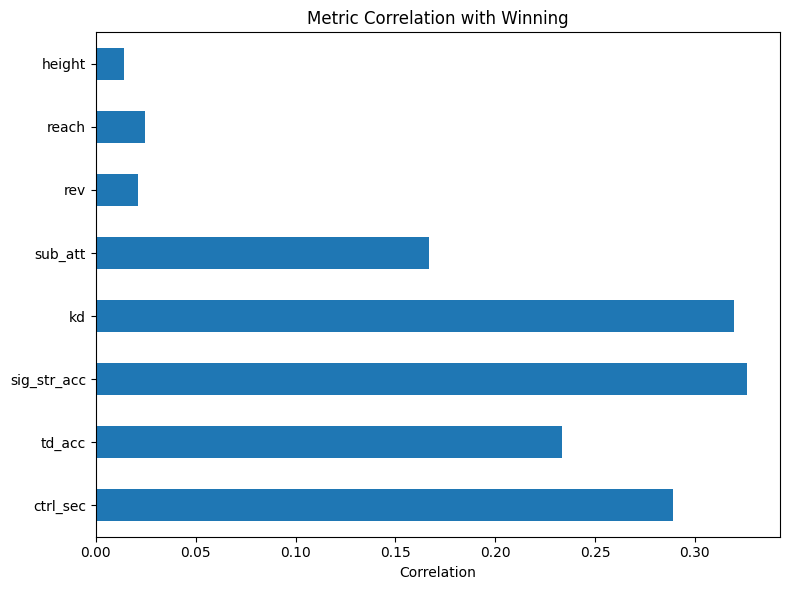

In [332]:
correlations.plot(kind='barh', title='Metric Correlation with Winning', figsize=(8, 6))
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

In [333]:
corr_men = stacked_records[stacked_records['gender'] == 'Men'][use_metrics].corrwith(\
stacked_records[stacked_records['gender'] == 'Men']['win_status'])

In [334]:
corr_men

ctrl_sec       0.287307
td_acc         0.227867
sig_str_acc    0.326816
kd             0.332618
sub_att        0.160497
rev            0.020399
reach          0.032979
height         0.017646
dtype: float64

In [335]:
corr_women = stacked_records[stacked_records['gender'] == 'Women'][use_metrics].corrwith(\
stacked_records[stacked_records['gender'] == 'Women']['win_status'])

In [336]:
corr_women

ctrl_sec       0.305011
td_acc         0.280172
sig_str_acc    0.325164
kd             0.199848
sub_att        0.224047
rev            0.027983
reach         -0.020875
height         0.001977
dtype: float64

In [337]:
corr_by_gender = pd.DataFrame({
    'Men': corr_men,
    'Women': corr_women
})

In [338]:
corr_by_gender

,Men,Women
ctrl_sec,0.287307,0.305011
td_acc,0.227867,0.280172
sig_str_acc,0.326816,0.325164
kd,0.332618,0.199848
sub_att,0.160497,0.224047
rev,0.020399,0.027983
reach,0.032979,-0.020875
height,0.017646,0.001977


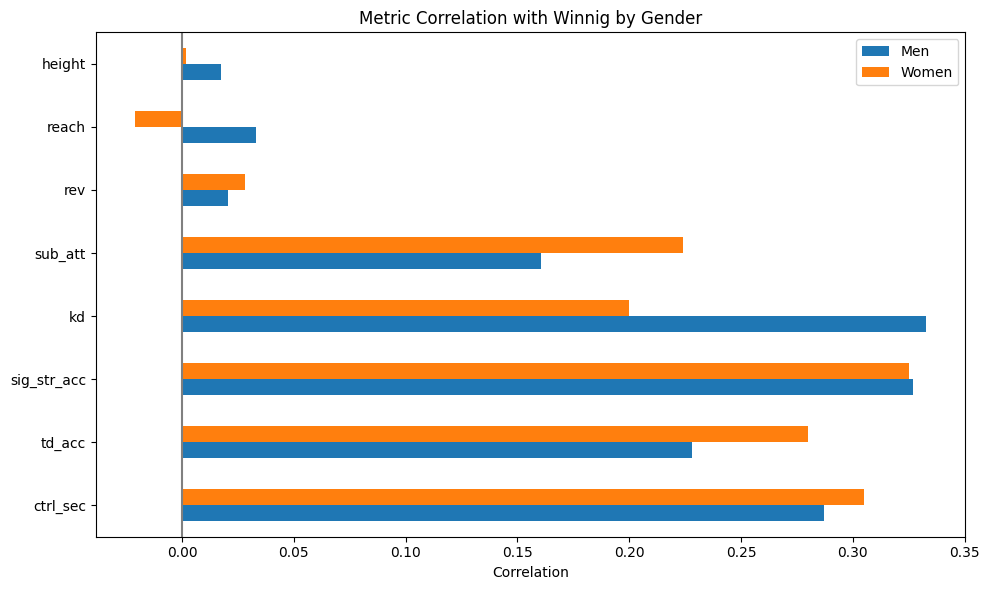

In [339]:
corr_by_gender.plot(kind='barh', figsize=(10, 6))
plt.title('Metric Correlation with Winnig by Gender')
plt.xlabel('Correlation')
plt.axvline(0, color='gray')
plt.tight_layout()
plt.show()

#### Overall, the patterns are similar across genders. While knockdowns and significant strike accuracy are the strongest predictors for men, submission attempts, control time and takedown accuracy display stronger correlations for women. Physical attributes like height and reach have lower correlation with winning. This could be explained, in part, by weight classes, as fighters in the same weight class tend to have similar height and reach.